## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\Colt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [9]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500

model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.8685 - acc: 0.3332 - val_loss: 1.7437 - val_acc: 0.3750
Epoch 2/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.6449 - acc: 0.4174 - val_loss: 1.6195 - val_acc: 0.4218
Epoch 3/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.5569 - acc: 0.4496 - val_loss: 1.5539 - val_acc: 0.4413
Epoch 4/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.4967 - acc: 0.4690 - val_loss: 1.5446 - val_acc: 0.4541
Epoch 5/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.4456 - acc: 0.4868 - val_loss: 1.5765 - val_acc: 0.4498
Epoch 6/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.4032 - acc: 0.5040 - val_loss: 1.5776 - val_acc: 0.4524
Epoch 7/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.3658 - acc: 0.5157 - val_loss: 1.4536 - 

50000/50000 [==============================] - 3s 58us/step - loss: 0.2985 - acc: 0.8964 - val_loss: 2.2160 - val_acc: 0.5252
Epoch 60/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2842 - acc: 0.9008 - val_loss: 2.2478 - val_acc: 0.5333
Epoch 61/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2835 - acc: 0.9002 - val_loss: 2.2926 - val_acc: 0.5328
Epoch 62/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2695 - acc: 0.9058 - val_loss: 2.4119 - val_acc: 0.5191
Epoch 63/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2628 - acc: 0.9080 - val_loss: 2.4956 - val_acc: 0.5298
Epoch 64/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2603 - acc: 0.9074 - val_loss: 2.5103 - val_acc: 0.5088
Epoch 65/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2498 - acc: 0.9115 - val_loss: 2.5446 - val_acc: 0.5253
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0566 - acc: 0.9805 - val_loss: 3.4998 - val_acc: 0.5370
Epoch 119/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0578 - acc: 0.9806 - val_loss: 3.5567 - val_acc: 0.5421
Epoch 120/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0589 - acc: 0.9798 - val_loss: 3.6060 - val_acc: 0.5353
Epoch 121/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0798 - acc: 0.9720 - val_loss: 3.6684 - val_acc: 0.5297
Epoch 122/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0694 - acc: 0.9754 - val_loss: 3.6778 - val_acc: 0.5323
Epoch 123/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1073 - acc: 0.9627 - val_loss: 3.7208 - val_acc: 0.5358
Epoch 124/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1032 - acc: 0.9629 - val_loss: 3.7638 - val_acc: 0.5310
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 59us/step - loss: 4.0034e-04 - acc: 1.0000 - val_loss: 4.0096 - val_acc: 0.5530
Epoch 177/500
50000/50000 [==============================] - 3s 58us/step - loss: 4.4458e-04 - acc: 1.0000 - val_loss: 4.0127 - val_acc: 0.5517
Epoch 178/500
50000/50000 [==============================] - 3s 58us/step - loss: 4.7794e-04 - acc: 1.0000 - val_loss: 4.0237 - val_acc: 0.5513
Epoch 179/500
50000/50000 [==============================] - 3s 59us/step - loss: 3.7294e-04 - acc: 1.0000 - val_loss: 4.0167 - val_acc: 0.5516
Epoch 180/500
50000/50000 [==============================] - 3s 62us/step - loss: 3.5067e-04 - acc: 1.0000 - val_loss: 4.0232 - val_acc: 0.5519
Epoch 181/500
50000/50000 [==============================] - 3s 63us/step - loss: 3.7243e-04 - acc: 1.0000 - val_loss: 4.0248 - val_acc: 0.5510
Epoch 182/500
50000/50000 [==============================] - 3s 63us/step - loss: 3.3888e-04 - acc: 1.0000 - val_loss: 4.0295 - val_acc: 0.5521
Epoch 

Epoch 233/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.7251e-04 - acc: 1.0000 - val_loss: 4.1152 - val_acc: 0.5532
Epoch 234/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6949e-04 - acc: 1.0000 - val_loss: 4.1174 - val_acc: 0.5529
Epoch 235/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.7043e-04 - acc: 1.0000 - val_loss: 4.1172 - val_acc: 0.5532
Epoch 236/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6759e-04 - acc: 1.0000 - val_loss: 4.1200 - val_acc: 0.5525
Epoch 237/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6737e-04 - acc: 1.0000 - val_loss: 4.1183 - val_acc: 0.5518
Epoch 238/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6640e-04 - acc: 1.0000 - val_loss: 4.1211 - val_acc: 0.5527
Epoch 239/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6313e-04 - acc: 1.0000 - val_loss: 4.1235 - val_acc:

Epoch 290/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1873e-04 - acc: 1.0000 - val_loss: 4.1690 - val_acc: 0.5525
Epoch 291/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1798e-04 - acc: 1.0000 - val_loss: 4.1705 - val_acc: 0.5526
Epoch 292/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1802e-04 - acc: 1.0000 - val_loss: 4.1697 - val_acc: 0.5529
Epoch 293/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1676e-04 - acc: 1.0000 - val_loss: 4.1710 - val_acc: 0.5529
Epoch 294/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1606e-04 - acc: 1.0000 - val_loss: 4.1707 - val_acc: 0.5529
Epoch 295/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1591e-04 - acc: 1.0000 - val_loss: 4.1724 - val_acc: 0.5531
Epoch 296/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1595e-04 - acc: 1.0000 - val_loss: 4.1736 - val_acc:

Epoch 347/500
50000/50000 [==============================] - 3s 63us/step - loss: 9.1984e-05 - acc: 1.0000 - val_loss: 4.2041 - val_acc: 0.5526
Epoch 348/500
50000/50000 [==============================] - 3s 62us/step - loss: 9.1551e-05 - acc: 1.0000 - val_loss: 4.2065 - val_acc: 0.5538
Epoch 349/500
50000/50000 [==============================] - 3s 60us/step - loss: 9.1190e-05 - acc: 1.0000 - val_loss: 4.2072 - val_acc: 0.5529
Epoch 350/500
50000/50000 [==============================] - 3s 59us/step - loss: 9.1162e-05 - acc: 1.0000 - val_loss: 4.2084 - val_acc: 0.5537
Epoch 351/500
50000/50000 [==============================] - 3s 58us/step - loss: 9.0553e-05 - acc: 1.0000 - val_loss: 4.2083 - val_acc: 0.5534
Epoch 352/500
50000/50000 [==============================] - 3s 59us/step - loss: 9.0069e-05 - acc: 1.0000 - val_loss: 4.2092 - val_acc: 0.5536
Epoch 353/500
50000/50000 [==============================] - 3s 60us/step - loss: 8.9878e-05 - acc: 1.0000 - val_loss: 4.2089 - val_acc:

Epoch 404/500
50000/50000 [==============================] - 3s 62us/step - loss: 7.5403e-05 - acc: 1.0000 - val_loss: 4.2354 - val_acc: 0.5536
Epoch 405/500
50000/50000 [==============================] - 3s 63us/step - loss: 7.5459e-05 - acc: 1.0000 - val_loss: 4.2367 - val_acc: 0.5536
Epoch 406/500
50000/50000 [==============================] - 3s 63us/step - loss: 7.5240e-05 - acc: 1.0000 - val_loss: 4.2364 - val_acc: 0.5541
Epoch 407/500
50000/50000 [==============================] - 3s 63us/step - loss: 7.4804e-05 - acc: 1.0000 - val_loss: 4.2380 - val_acc: 0.5541
Epoch 408/500
50000/50000 [==============================] - 3s 64us/step - loss: 7.4630e-05 - acc: 1.0000 - val_loss: 4.2378 - val_acc: 0.5543
Epoch 409/500
50000/50000 [==============================] - 3s 63us/step - loss: 7.4441e-05 - acc: 1.0000 - val_loss: 4.2375 - val_acc: 0.5534
Epoch 410/500
50000/50000 [==============================] - 3s 63us/step - loss: 7.4242e-05 - acc: 1.0000 - val_loss: 4.2384 - val_acc:

Epoch 461/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.4538e-05 - acc: 1.0000 - val_loss: 4.2591 - val_acc: 0.5541
Epoch 462/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.4260e-05 - acc: 1.0000 - val_loss: 4.2602 - val_acc: 0.5532
Epoch 463/500
50000/50000 [==============================] - 3s 58us/step - loss: 6.4094e-05 - acc: 1.0000 - val_loss: 4.2609 - val_acc: 0.5537
Epoch 464/500
50000/50000 [==============================] - 3s 62us/step - loss: 6.3927e-05 - acc: 1.0000 - val_loss: 4.2612 - val_acc: 0.5535
Epoch 465/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.3709e-05 - acc: 1.0000 - val_loss: 4.2617 - val_acc: 0.5534
Epoch 466/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.3577e-05 - acc: 1.0000 - val_loss: 4.2616 - val_acc: 0.5543
Epoch 467/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.3359e-05 - acc: 1.0000 - val_loss: 4.2626 - val_acc:

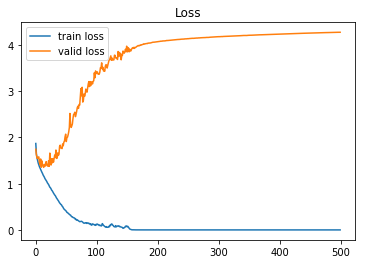

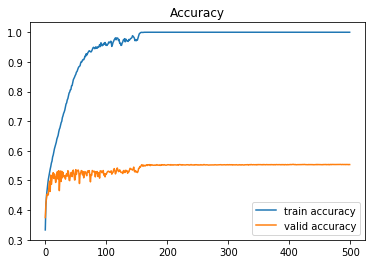

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()